In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)


df = pd.read_csv('/home/achint/safegraph.csv')

geo_df = pd.read_csv('/home/achint/geometry.csv')

In [4]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     |████████████████████████████████| 41.6 MB 42 kB/s s eta 0:00:01


In [6]:
geo_df = geo_df[['naics_code','top_category','sub_category','latitude','longitude','postal_code','category_tags','geometry_type','polygon_wkt']]

In [7]:
geo_df = geo_df.drop_duplicates(subset = ['latitude','longitude'])

In [8]:
geo_df

,naics_code,top_category,sub_category,latitude,longitude,postal_code,category_tags,geometry_type,polygon_wkt
0,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,55.187003,-118.808118,T8V 8L1,"Acupuncture,Pain Management,Physical Therapy",POLYGON,"POLYGON ((-118.80818 55.187078, -118.808601 55..."
1,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,55.179180,-118.793168,T8V 1R6,Family Doctor,POLYGON,POLYGON ((-118.79411502550842 55.1793177644228...
2,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,55.161674,-118.828904,T8V 4W4,NaN,POLYGON,"POLYGON ((-118.829033 55.161877, -118.828763 5..."
3,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,55.171865,-118.799293,T8V 0Y2,NaN,POLYGON,"POLYGON ((-118.79913577774394 55.171806, -118...."
4,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,56.665704,-111.341409,T9H 4B5,NaN,POLYGON,"POLYGON ((-111.341501 56.665565, -111.341566 5..."
...,...,...,...,...,...,...,...,...,...
16369,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,43.686672,-79.402617,M4V 1R1,NaN,POLYGON,"POLYGON ((-79.402448 43.686601, -79.402657 43...."
16370,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,49.329016,-123.159777,V7V 3S8,NaN,POLYGON,"POLYGON ((-123.1597865 49.328953624271925, -12..."
16371,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,49.328983,-123.159764,V7V 3S8,NaN,POLYGON,"POLYGON ((-123.1597865 49.328953624271925, -12..."
16372,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,49.321679,-123.073575,V7M 1T3,Sports Medicine,POLYGON,"POLYGON ((-123.073638 49.321621, -123.073642 4..."


In [9]:
merge = df.merge(geo_df, on=["postal_code"])

In [10]:
merge

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_home_aggregation,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,naics_code,top_category,sub_category,latitude,longitude,category_tags,geometry_type,polygon_wkt
0,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-09-07T00:00:00-07:00,2020-09-14T00:00:00-07:00,4,2,"[0,1,0,1,0,1,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59150148,{},{},"{""CA:59331457"":4}","{""CA"":4}",NaN,382.5,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",290.590368,3.052028e-06,3.187134e-06,0.005457,0.008989,623110,Nursing Care Facilities (Skilled Nursing Facil...,Nursing Care Facilities (Skilled Nursing Facil...,49.332717,-123.047451,"Assisted Living,Memory Care,Retirement Home,Sk...",POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
1,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-09-07T00:00:00-07:00,2020-09-14T00:00:00-07:00,4,2,"[0,1,0,1,0,1,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59150148,{},{},"{""CA:59331457"":4}","{""CA"":4}",NaN,382.5,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",290.590368,3.052028e-06,3.187134e-06,0.005457,0.008989,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,49.332736,-123.047481,NaN,POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
2,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Rd,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2022-05-02T00:00:00-07:00,2022-05-09T00:00:00-07:00,8,4,"[2,1,1,1,1,1,1]","[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0...",CA:59150148,"{""CA:59150079"":4,""CA:59152809"":4}","{""CA:59150333"":4}","{""CA:59150079"":4,""CA:59152809"":4}","{""CA"":4}",NaN,484.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":2,""61-120"":...",{},{},"{""android"":0,""ios"":4}",382.106389,7.588534e-06,7.946899e-06,0.205128,0.444444,623110,Nursing Care Facilities (Skilled Nursing Facil...,Nursing Care Facilities (Skilled Nursing Facil...,49.332717,-123.047451,"Assisted Living,Memory Care,Retirement Home,Sk...",POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
3,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Rd,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2022-05-02T00:00:00-07:00,2022-05-09T00:00:00-07:00,8,4,"[2,1,1,1,1,1,1]","[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0...",CA:59150148,"{""CA:59150079"":4,""CA:59152809"":4}","{""CA:59150333"":4}","{""CA:59150079"":4,""CA:59152809"":4}","{""CA"":4}",NaN,484.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":2,""61-120"":...",{},{},"{""android"":0,""ios"":4}",382.106389,7.588534e-06,7.946899e-06,0.205128,0.444444,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,49.332736,-123.047481,NaN,POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
4,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-07-13T00:00:00-07:00,2020-07-20T00:00:00-07:00,19,9,"[1,5,3,2,2,5,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0...",CA:59150148,"{""CA:591

In [11]:
merge_df = merge.drop_duplicates(subset=['date_range_start','latitude','longitude'], keep="first")

In [12]:
merge_df

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_home_aggregation,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,naics_code,top_category,sub_category,latitude,longitude,category_tags,geometry_type,polygon_wkt
0,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-09-07T00:00:00-07:00,2020-09-14T00:00:00-07:00,4,2,"[0,1,0,1,0,1,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59150148,{},{},"{""CA:59331457"":4}","{""CA"":4}",NaN,382.5,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",290.590368,3.052028e-06,3.187134e-06,0.005457,0.008989,623110,Nursing Care Facilities (Skilled Nursing Facil...,Nursing Care Facilities (Skilled Nursing Facil...,49.332717,-123.047451,"Assisted Living,Memory Care,Retirement Home,Sk...",POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
1,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-09-07T00:00:00-07:00,2020-09-14T00:00:00-07:00,4,2,"[0,1,0,1,0,1,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59150148,{},{},"{""CA:59331457"":4}","{""CA"":4}",NaN,382.5,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",290.590368,3.052028e-06,3.187134e-06,0.005457,0.008989,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,49.332736,-123.047481,NaN,POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
2,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Rd,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2022-05-02T00:00:00-07:00,2022-05-09T00:00:00-07:00,8,4,"[2,1,1,1,1,1,1]","[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0...",CA:59150148,"{""CA:59150079"":4,""CA:59152809"":4}","{""CA:59150333"":4}","{""CA:59150079"":4,""CA:59152809"":4}","{""CA"":4}",NaN,484.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":2,""61-120"":...",{},{},"{""android"":0,""ios"":4}",382.106389,7.588534e-06,7.946899e-06,0.205128,0.444444,623110,Nursing Care Facilities (Skilled Nursing Facil...,Nursing Care Facilities (Skilled Nursing Facil...,49.332717,-123.047451,"Assisted Living,Memory Care,Retirement Home,Sk...",POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
3,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Rd,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2022-05-02T00:00:00-07:00,2022-05-09T00:00:00-07:00,8,4,"[2,1,1,1,1,1,1]","[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0...",CA:59150148,"{""CA:59150079"":4,""CA:59152809"":4}","{""CA:59150333"":4}","{""CA:59150079"":4,""CA:59152809"":4}","{""CA"":4}",NaN,484.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":2,""61-120"":...",{},{},"{""android"":0,""ios"":4}",382.106389,7.588534e-06,7.946899e-06,0.205128,0.444444,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,49.332736,-123.047481,NaN,POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
4,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-07-13T00:00:00-07:00,2020-07-20T00:00:00-07:00,19,9,"[1,5,3,2,2,5,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0...",CA:59150148,"{""CA:591

In [13]:
merge_df.to_csv('merge_df.csv')

In [68]:
merge_df

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_home_aggregation,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,naics_code,top_category,sub_category,latitude,longitude,category_tags,geometry_type,polygon_wkt
0,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-09-07T00:00:00-07:00,2020-09-14T00:00:00-07:00,4,2,"[0,1,0,1,0,1,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59150148,{},{},"{""CA:59331457"":4}","{""CA"":4}",NaN,382.5,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",290.590368,3.052028e-06,3.187134e-06,0.005457,0.008989,623110,Nursing Care Facilities (Skilled Nursing Facil...,Nursing Care Facilities (Skilled Nursing Facil...,49.332717,-123.047451,"Assisted Living,Memory Care,Retirement Home,Sk...",POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
1,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-09-07T00:00:00-07:00,2020-09-14T00:00:00-07:00,4,2,"[0,1,0,1,0,1,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59150148,{},{},"{""CA:59331457"":4}","{""CA"":4}",NaN,382.5,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",290.590368,3.052028e-06,3.187134e-06,0.005457,0.008989,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,49.332736,-123.047481,NaN,POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
2,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Rd,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2022-05-02T00:00:00-07:00,2022-05-09T00:00:00-07:00,8,4,"[2,1,1,1,1,1,1]","[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0...",CA:59150148,"{""CA:59150079"":4,""CA:59152809"":4}","{""CA:59150333"":4}","{""CA:59150079"":4,""CA:59152809"":4}","{""CA"":4}",NaN,484.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":2,""61-120"":...",{},{},"{""android"":0,""ios"":4}",382.106389,7.588534e-06,7.946899e-06,0.205128,0.444444,623110,Nursing Care Facilities (Skilled Nursing Facil...,Nursing Care Facilities (Skilled Nursing Facil...,49.332717,-123.047451,"Assisted Living,Memory Care,Retirement Home,Sk...",POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
3,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Rd,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2022-05-02T00:00:00-07:00,2022-05-09T00:00:00-07:00,8,4,"[2,1,1,1,1,1,1]","[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0...",CA:59150148,"{""CA:59150079"":4,""CA:59152809"":4}","{""CA:59150333"":4}","{""CA:59150079"":4,""CA:59152809"":4}","{""CA"":4}",NaN,484.0,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":2,""61-120"":...",{},{},"{""android"":0,""ios"":4}",382.106389,7.588534e-06,7.946899e-06,0.205128,0.444444,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,49.332736,-123.047481,NaN,POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
4,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-07-13T00:00:00-07:00,2020-07-20T00:00:00-07:00,19,9,"[1,5,3,2,2,5,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0...",CA:59150148,"{""CA:591

In [37]:
df_ON = merge_df.loc[merge_df['region'] == 'ON']
df_AB = merge_df.loc[merge_df['region'] == 'AB']
df_BC = merge_df.loc[merge_df['region'] == 'BC']
df_QC = merge_df.loc[merge_df['region'] == 'QC']
df = pd.concat([df_ON,df_AB,df_BC,df_QC])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5657 entries, 0 to 5656
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   index                                       5657 non-null   int64   
 1   placekey                                    5657 non-null   object  
 2   parent_placekey                             318 non-null    object  
 3   location_name                               5657 non-null   object  
 4   street_address                              5657 non-null   object  
 5   city                                        5657 non-null   object  
 6   region                                      5657 non-null   object  
 7   postal_code                                 5657 non-null   object  
 8   iso_country_code                            5657 non-null   object  
 9   safegraph_brand_ids                         115 non-null    object  
 10  

In [77]:
df2 = merge_df.drop_duplicates(subset = "placekey")

In [78]:
df2

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_home_aggregation,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,naics_code,top_category,sub_category,latitude,longitude,category_tags,geometry_type,polygon_wkt
0,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-09-07T00:00:00-07:00,2020-09-14T00:00:00-07:00,4,2,"[0,1,0,1,0,1,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59150148,{},{},"{""CA:59331457"":4}","{""CA"":4}",NaN,382.5,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",290.590368,3.052028e-06,3.187134e-06,0.005457,0.008989,623110,Nursing Care Facilities (Skilled Nursing Facil...,Nursing Care Facilities (Skilled Nursing Facil...,49.332717,-123.047451,"Assisted Living,Memory Care,Retirement Home,Sk...",POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
10,222-223@5x6-k2d-nnq,NaN,Sunrise of Lynn Valley,980 Lynn Valley Rd,North Vancouver,BC,V7J 3V7,CA,NaN,NaN,2022-04-18T00:00:00-07:00,2022-04-25T00:00:00-07:00,3,2,"[0,0,1,1,1,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59150148,{},"{""CA:59150254"":4}","{""CA:59152870"":4}",{},NaN,448.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",277.243849,2.887028e-06,6.507260e-06,0.001563,0.002353,623110,Nursing Care Facilities (Skilled Nursing Facil...,Nursing Care Facilities (Skilled Nursing Facil...,49.332717,-123.047451,"Assisted Living,Memory Care,Retirement Home,Sk...",POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4..."
356,222-222@65w-qkr-x89,NaN,Fondation Du Centre Hospitalier Regional Du Su...,387 Rue Victoria,Salaberry-de-valleyfield,QC,J6T 1B7,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,10,7,"[0,1,3,0,0,5,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:24700120,"{""CA:24663033"":4,""CA:24710190"":4,""CA:24700144"":4}","{""CA:24710022"":4,""CA:24700004"":4}","{""CA:24700133"":4}","{""CA"":6}",7127.0,72.0,"{""<5"":0,""5-10"":2,""11-20"":1,""21-60"":2,""61-120"":...","{""McDonald's"":14,""SAQ"":14}","{""Metro"":43,""SAQ"":29,""Shell Oil"":29,""Harnois É...","{""android"":4,""ios"":5}",699.882808,4.788935e-06,6.626535e-06,0.000987,0.001776,622110,General Medical and Surgical Hospitals,General Medical and Surgical Hospitals,45.255936,-74.140285,NaN,POLYGON,"POLYGON ((-74.140372 45.255965, -74.140207 45...."
519,222-222@665-55g-b49,NaN,Mohindra B Krishan Dr,959 Chemong Road,Peterborough,ON,K9H 7E3,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,1,1,"[0,0,0,1,0,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:35150059,"{""CA:35150123"":4}",{},{},{},NaN,23.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":1,""61-120"":...",{},{},"{""android"":0,""ios"":4}",57.637318,2.407436e-07,4.801766e-07,0.000151,0.000214,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,44.322414,-78.335282,NaN,POLYGON,"POLYGON ((-78.33503728834884 44.322405, -78.33..."
548,222-222@665-zbm-zvf,NaN,Bosset Philippe Dr,3 Grenadier Hts,Toronto,ON,M6S 2W5,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,16,11,"[2,1,1,1,3,7,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0...",CA:35201312,"{""CA:35201487"":4}","{""CA:35200272"":4,""CA:35190123"":4}","{""CA:35201487"":4}","{""CA"":8}",4728.0,26.0,"{""<5"":0,""5-10"":5,""11-20"":1,""21-60"":8,""61-120"":...","{""Circ

In [40]:
df.to_csv('df.csv')

In [20]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 8.9 kB/s eta 0:00:01
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [21]:

import plotly.express as px

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [22]:
!pip install shapely

  Using cached Shapely-1.8.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.1 MB)


In [23]:
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.21-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.6 MB)
  Using cached pyproj-3.3.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.7 MB)
     |████████████████████████████████| 96 kB 901 kB/s eta 0:00:01
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: pyproj
    Found existing installation: pyproj 1.9.6
    Uninstalling pyproj-1.9.6:
      Successfully uninstalled pyproj-1.9.6


In [24]:
!pip install contextily

  Using cached contextily-1.2.0-py3-none-any.whl (16 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
  Using cached geopy-2.2.0-py3-none-any.whl (118 kB)
     |████████████████████████████████| 62 kB 278 kB/s eta 0:00:011
     |████████████████████████████████| 306 kB 9.4 MB/s eta 0:00:01
  Using cached xyzservices-2022.4.0-py3-none-any.whl (36 kB)
  Using cached rasterio-1.2.10-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (19.2 MB)
  Using cached geographiclib-1.52-py3-none-any.whl (38 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached affine-2.3.1-py2.py3-none-any.whl (16 kB)
     |████████████████████████████████| 138 kB 23.7 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 1.2 MB/s  eta 0:00:01


In [32]:
!pip install --upgrade pyproj==3.3.1

In [26]:
!pip install folium

  Using cached folium-0.12.1.post1-py2.py3-none-any.whl (95 kB)
  Using cached branca-0.5.0-py3-none-any.whl (24 kB)


In [27]:
from shapely.geometry import Point
import geopandas as gpd
import seaborn as sns
import contextily
import math
from shapely.geometry import Point, LineString

import folium
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [79]:
geometry = [Point(xy) for xy in zip(df2['longitude'], df2['latitude'])]

In [80]:
train1 = gpd.GeoDataFrame(df2, crs='EPSG:4326', geometry=geometry) #don't change geometry

In [81]:
train1= train1.to_crs(crs='EPSG:3857')

In [82]:
train1.tail()

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_home_aggregation,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,naics_code,top_category,sub_category,latitude,longitude,category_tags,geometry_type,polygon_wkt,geometry
2036317,222-224@63v-m65-cbk,NaN,Podiatric Consultants,1354 King St E,Kitchener,ON,N2G 2N7,CA,NaN,NaN,2022-01-10T00:00:00-05:00,2022-01-17T00:00:00-05:00,1,1,"[1,0,0,0,0,0,0]","[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:35300358,{},{},{},"{""CA"":4}",NaN,22.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":1,""61-120"":...",{},{},"{""android"":0,""ios"":0}",81.269063,4.461408e-07,1.103776e-06,0.000260,0.000388,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,43.440415,-80.467289,Podiatrists,POLYGON,"POLYGON ((-80.467429 43.44037, -80.46724 43.44...",POINT (-8957577.637 5379249.575)
2036318,22d-222@665-zpb-snq,NaN,Dr Michael Tsang,280 West Beaver Creek Road Unit 33,Richmond Hill,ON,L4B 3Z1,CA,NaN,NaN,2020-12-21T00:00:00-05:00,2020-12-28T00:00:00-05:00,1,1,"[0,0,0,0,0,0,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:35190434,"{""CA:35201146"":4}",{},{},{},NaN,6.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",135.215086,4.532783e-07,1.009896e-06,0.000306,0.000443,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,43.843771,-79.388682,Family Doctor,POLYGON,POLYGON ((-79.38873905114505 43.84364062251727...,POINT (-8837507.655 5441297.131)
2036319,222-222@63v-khk-gff,NaN,Antiphospholipid Syndrome,2140 Sunningdale Rd W,London,ON,N6H 5J7,CA,NaN,NaN,2022-05-09T00:00:00-04:00,2022-05-16T00:00:00-04:00,1,1,"[0,0,0,1,0,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:35390727,{},{},"{""CA:35390460"":4}",{},NaN,10.0,"{""<5"":0,""5-10"":1,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",39.165293,3.072956e-07,6.210856e-07,0.000115,0.000193,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,43.016333,-81.361898,NaN,POLYGON,"POLYGON ((-81.362005 43.016285, -81.362031 43....",POINT (-9057165.055 5314458.227)
2036320,22n-222@65x-949-k4v,NaN,ComForcare Senior Services,1673 Carling Avenue Unit 202,Ottawa,ON,K2A 1C4,CA,SG_BRAND_48d6696e48853d20a2288efdcfdec98a,ComForcare Senior Services,2020-05-04T00:00:00-04:00,2020-05-11T00:00:00-04:00,1,1,"[0,0,0,0,1,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:35061754,{},{},{},{},NaN,536.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":4,""ios"":0}",98.947908,3.188800e-07,6.171228e-07,0.000168,0.000313,623312,Continuing Care Retirement Communities and Ass...,Assisted Living Facilities for the Elderly,45.379856,-75.749140,"Assisted Living,Elder Care,Memory Care,Skilled...",POLYGON,POLYGON ((-75.74908345539525 45.37999338203218...,POINT (-8432355.693 5681521.592)
2036322,zzw-227@66b-mcz-ct9,zzw-225@66b-mcz-ct9,Clinique D'endocrinologie De Levis,50 Route Du President Kennedy,Levis,QC,G6V 6W8,CA,NaN,NaN,2022-01-17T00:00:00-05:00,2022-01-24T00:00:00-05:00,1,1,"[0,0,1,0,0,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:24250237,{},{},{},{},NaN,510.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":4,""ios"":0}",105.133428,8.852770e-07,2.384996e-06,0.000546,0.000773,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,46.794857,-71.176770,NaN,POLYGON,POLYGON ((-71.17678176599998 46.79504485600

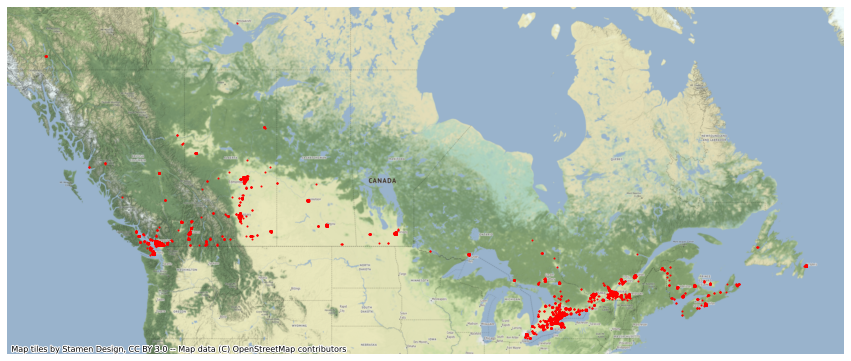

In [83]:
ax = train1.plot(figsize=(15,10), markersize=1, color='red')
contextily.add_basemap(ax)
ax.set_axis_off()

# plt.title('Talento Estratégico')
plt.show()

In [84]:
df2

,placekey,parent_placekey,location_name,street_address,city,region,postal_code,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_home_aggregation,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,naics_code,top_category,sub_category,latitude,longitude,category_tags,geometry_type,polygon_wkt,geometry
0,222-222@5x6-k2d-nnq,NaN,Sunrise Senior Living,980 Lynn Valley Road,North Vancouver,BC,V7J 3V7,CA,SG_BRAND_516ba83a8efa5bf6bdc8bf2383baf9e1,Sunrise Senior Living,2020-09-07T00:00:00-07:00,2020-09-14T00:00:00-07:00,4,2,"[0,1,0,1,0,1,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59150148,{},{},"{""CA:59331457"":4}","{""CA"":4}",NaN,382.5,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",290.590368,3.052028e-06,3.187134e-06,0.005457,0.008989,623110,Nursing Care Facilities (Skilled Nursing Facil...,Nursing Care Facilities (Skilled Nursing Facil...,49.332717,-123.047451,"Assisted Living,Memory Care,Retirement Home,Sk...",POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4...",POINT (-123.04745 49.33272)
10,222-223@5x6-k2d-nnq,NaN,Sunrise of Lynn Valley,980 Lynn Valley Rd,North Vancouver,BC,V7J 3V7,CA,NaN,NaN,2022-04-18T00:00:00-07:00,2022-04-25T00:00:00-07:00,3,2,"[0,0,1,1,1,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:59150148,{},"{""CA:59150254"":4}","{""CA:59152870"":4}",{},NaN,448.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":0,""61-120"":...",{},{},"{""android"":0,""ios"":0}",277.243849,2.887028e-06,6.507260e-06,0.001563,0.002353,623110,Nursing Care Facilities (Skilled Nursing Facil...,Nursing Care Facilities (Skilled Nursing Facil...,49.332717,-123.047451,"Assisted Living,Memory Care,Retirement Home,Sk...",POLYGON,"POLYGON ((-123.048439 49.332447, -123.047487 4...",POINT (-123.04745 49.33272)
356,222-222@65w-qkr-x89,NaN,Fondation Du Centre Hospitalier Regional Du Su...,387 Rue Victoria,Salaberry-de-valleyfield,QC,J6T 1B7,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,10,7,"[0,1,3,0,0,5,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:24700120,"{""CA:24663033"":4,""CA:24710190"":4,""CA:24700144"":4}","{""CA:24710022"":4,""CA:24700004"":4}","{""CA:24700133"":4}","{""CA"":6}",7127.0,72.0,"{""<5"":0,""5-10"":2,""11-20"":1,""21-60"":2,""61-120"":...","{""McDonald's"":14,""SAQ"":14}","{""Metro"":43,""SAQ"":29,""Shell Oil"":29,""Harnois É...","{""android"":4,""ios"":5}",699.882808,4.788935e-06,6.626535e-06,0.000987,0.001776,622110,General Medical and Surgical Hospitals,General Medical and Surgical Hospitals,45.255936,-74.140285,NaN,POLYGON,"POLYGON ((-74.140372 45.255965, -74.140207 45....",POINT (-74.14029 45.25594)
519,222-222@665-55g-b49,NaN,Mohindra B Krishan Dr,959 Chemong Road,Peterborough,ON,K9H 7E3,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,1,1,"[0,0,0,1,0,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:35150059,"{""CA:35150123"":4}",{},{},{},NaN,23.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":1,""61-120"":...",{},{},"{""android"":0,""ios"":4}",57.637318,2.407436e-07,4.801766e-07,0.000151,0.000214,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,44.322414,-78.335282,NaN,POLYGON,"POLYGON ((-78.33503728834884 44.322405, -78.33...",POINT (-78.33528 44.32241)
548,222-222@665-zbm-zvf,NaN,Bosset Philippe Dr,3 Grenadier Hts,Toronto,ON,M6S 2W5,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,16,11,"[2,1,1,1,3,7,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0...",CA:35201312,"{""CA:35201487"":4}","{""CA:35200272"":4,""CA:35190123"":4}

In [46]:
# !apt-get install libgeos-3.6.2
# !apt-get install libgeos-dev
!pip install git+https://github.com/matplotlib/basemap#subdirectory=packages/basemap

  Cloning https://github.com/matplotlib/basemap to /tmp/pip-req-build-lvnu7ysf
  Running command git clone -q https://github.com/matplotlib/basemap /tmp/pip-req-build-lvnu7ysf
^C
ERROR: Operation cancelled by user


In [34]:
!pip install sklearn

     |████████████████████████████████| 31.2 MB 57 kB/s  eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d14039a296256108afac6a05265477247a840a0e97cbc8f0ed27e7b1653f9c31
  Stored in directory: /home/achint/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
# print(os.listdir("../input"))

In [48]:
df.reset_index(inplace = True)

In [95]:
df.head()

,index,placekey,parent_placekey,location_name,street_address,city,region,postal_code,iso_country_code,safegraph_brand_ids,brands,date_range_start,date_range_end,raw_visit_counts,raw_visitor_counts,visits_by_day,visits_by_each_hour,poi_cbg,visitor_home_cbgs,visitor_home_aggregation,visitor_daytime_cbgs,visitor_country_of_origin,distance_from_home,median_dwell,bucketed_dwell_times,related_same_day_brand,related_same_week_brand,device_type,normalized_visits_by_state_scaling,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,naics_code,top_category,sub_category,latitude,longitude,category_tags,geometry_type,polygon_wkt,geometry
0,519,222-222@665-55g-b49,NaN,Mohindra B Krishan Dr,959 Chemong Road,Peterborough,ON,K9H 7E3,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,1,1,"[0,0,0,1,0,0,0]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:35150059,"{""CA:35150123"":4}",{},{},{},NaN,23.0,"{""<5"":0,""5-10"":0,""11-20"":0,""21-60"":1,""61-120"":...",{},{},"{""android"":0,""ios"":4}",57.637318,2.407436e-07,4.801766e-07,0.000151,0.000214,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,44.322414,-78.335282,NaN,POLYGON,"POLYGON ((-78.33503728834884 44.322405, -78.33...",POINT (-78.33528 44.32241)
1,548,222-222@665-zbm-zvf,NaN,Bosset Philippe Dr,3 Grenadier Hts,Toronto,ON,M6S 2W5,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,16,11,"[2,1,1,1,3,7,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0...",CA:35201312,"{""CA:35201487"":4}","{""CA:35200272"":4,""CA:35190123"":4}","{""CA:35201487"":4}","{""CA"":8}",4728.0,26.0,"{""<5"":0,""5-10"":5,""11-20"":1,""21-60"":8,""61-120"":...","{""Circle K Gas"":7,""Esso"":7,""A&W (Canada)"":7,""R...","{""Pet Valu"":18,""Circle K Gas"":9,""Esso"":9,""Petr...","{""android"":7,""ios"":0}",922.197085,3.851898e-06,5.281943e-06,0.002410,0.003427,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,43.641087,-79.468688,NaN,POLYGON,"POLYGON ((-79.468626 43.641154, -79.468601 43....",POINT (-79.46869 43.64109)
2,687,222-222@665-zdd-wff,NaN,Parents For Youth Limited,184 Bayview Heights Drive,East York,ON,M4G 2Y9,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,4,4,"[0,1,0,1,0,1,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",CA:35200746,{},{},"{""CA:35202771"":4}","{""CA"":4}",NaN,35.5,"{""<5"":0,""5-10"":0,""11-20"":1,""21-60"":2,""61-120"":...",{},{},"{""android"":4,""ios"":4}",230.549271,9.629746e-07,1.920707e-06,0.000602,0.000857,621111,Offices of Physicians,Offices of Physicians (except Mental Health Sp...,43.694035,-79.371049,NaN,POLYGON,"POLYGON ((-79.37089 43.693994, -79.370983 43.6...",POINT (-79.37105 43.69403)
3,2632,222-223@665-z8j-ysq,NaN,Hospitals,3560 Bathurst Street,North York,ON,M6A 2E1,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,111,100,"[6,9,71,3,12,6,4]","[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,0...",CA:35204805,"{""CA:35202283"":4,""CA:35211855"":4,""CA:35204198""...","{""CA:35200118"":9,""CA:35200237"":5,""CA:35200158""...","{""CA:35202115"":4,""CA:35202392"":4,""CA:35204805""...","{""CA"":46}",5442.0,71.0,"{""<5"":3,""5-10"":15,""11-20"":3,""21-60"":27,""61-120...","{""Walmart"":2,""Costco"":2,""Esso"":1,""Tesla Motors...","{""Costco"":3,""Shell Oil"":3,""Walmart"":2,""Tesla M...","{""android"":55,""ios"":40}",6397.742278,2.672254e-05,4.801766e-05,0.006104,0.010169,622110,General Medical and Surgical Hospitals,General Medical and Surgical Hospitals,43.730529,-79.433669,NaN,POLYGON,"POLYGON ((-79.435541 43.729511, -79.435683 43....",POINT (-79.43367 43.73053)
4,4222,223-222@63v-fzb-6rk,NaN,Willoughby D P Dr Phys,379 Hunter Street,Woodstock,ON,N4S 4G3,CA,NaN,NaN,2020-09-07T00:00:00-04:00,2020-09-14T00:00:00-04:00,7,3,"[1,1,1,2,1,0,1]","[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0...",CA:35320183,"{""CA:35320183"":4}",{},"{""CA:35320183"":4}","{""CA"":4

In [49]:
def plot_map(data, column, alpha=0.7, colormap='coolwarm'):
    plt.figure(figsize=(30,30))

    m = Basemap(projection='lcc', 
                resolution='h',
            lat_0=45,
            lon_0=-97.5,
                llcrnrlon=-150, llcrnrlat=15,
                urcrnrlon=-45, urcrnrlat=75)

    m.drawcoastlines(linewidth=1)
    m.drawcountries(linewidth=2, color='blue')
    m.drawstates()
    m.drawmapboundary()
    
    lons = data["longitude"].values.tolist()
    lats = data["latitude"].values.tolist()

    # Draw scatter plot with all CBGs
    x,y = m(lons, lats)
    m.scatter(x, y, c=data[column], alpha=alpha, cmap=colormap, s=4)
    m.colorbar(location="bottom", pad="4%")
    
    plt.show()

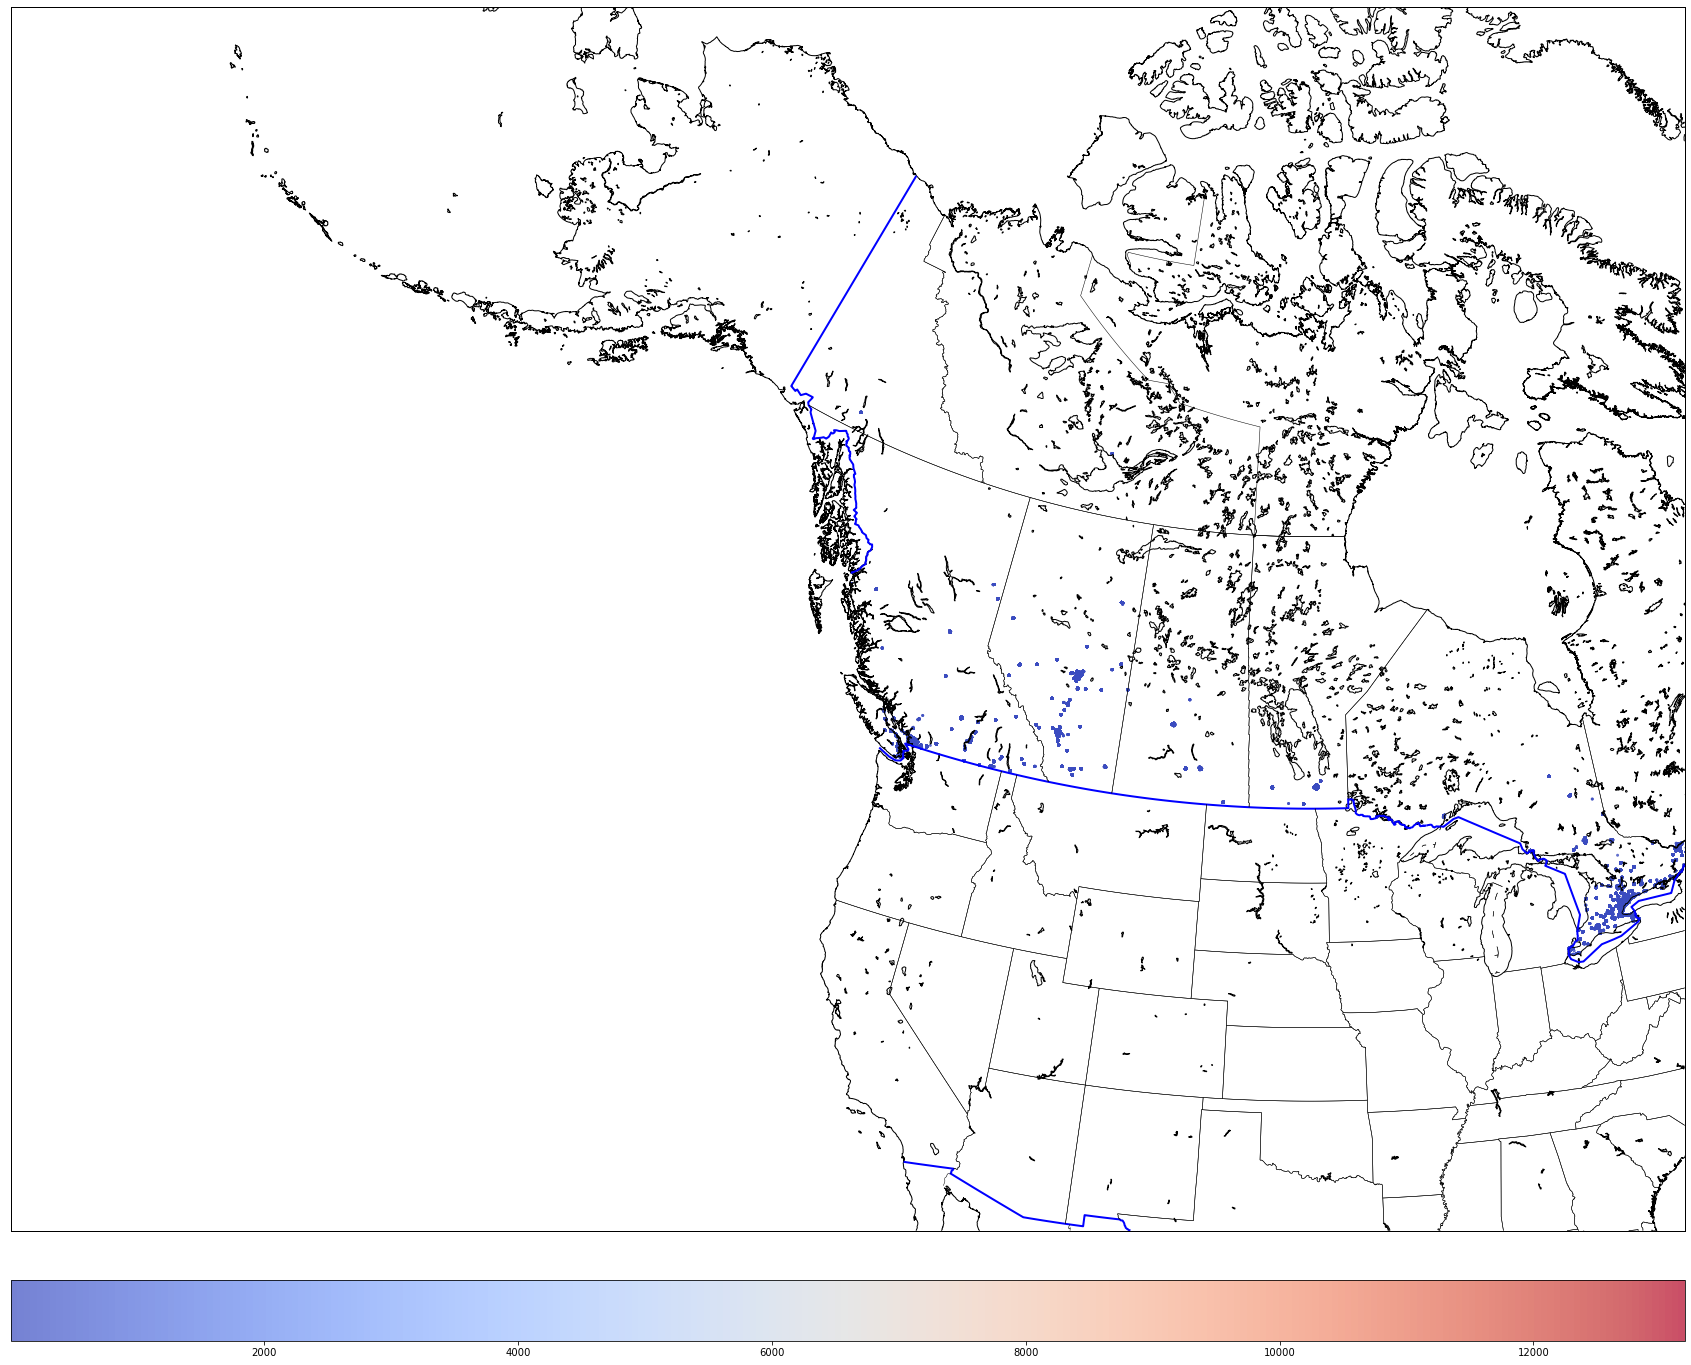

In [94]:
plot_map(df,'raw_visit_counts')

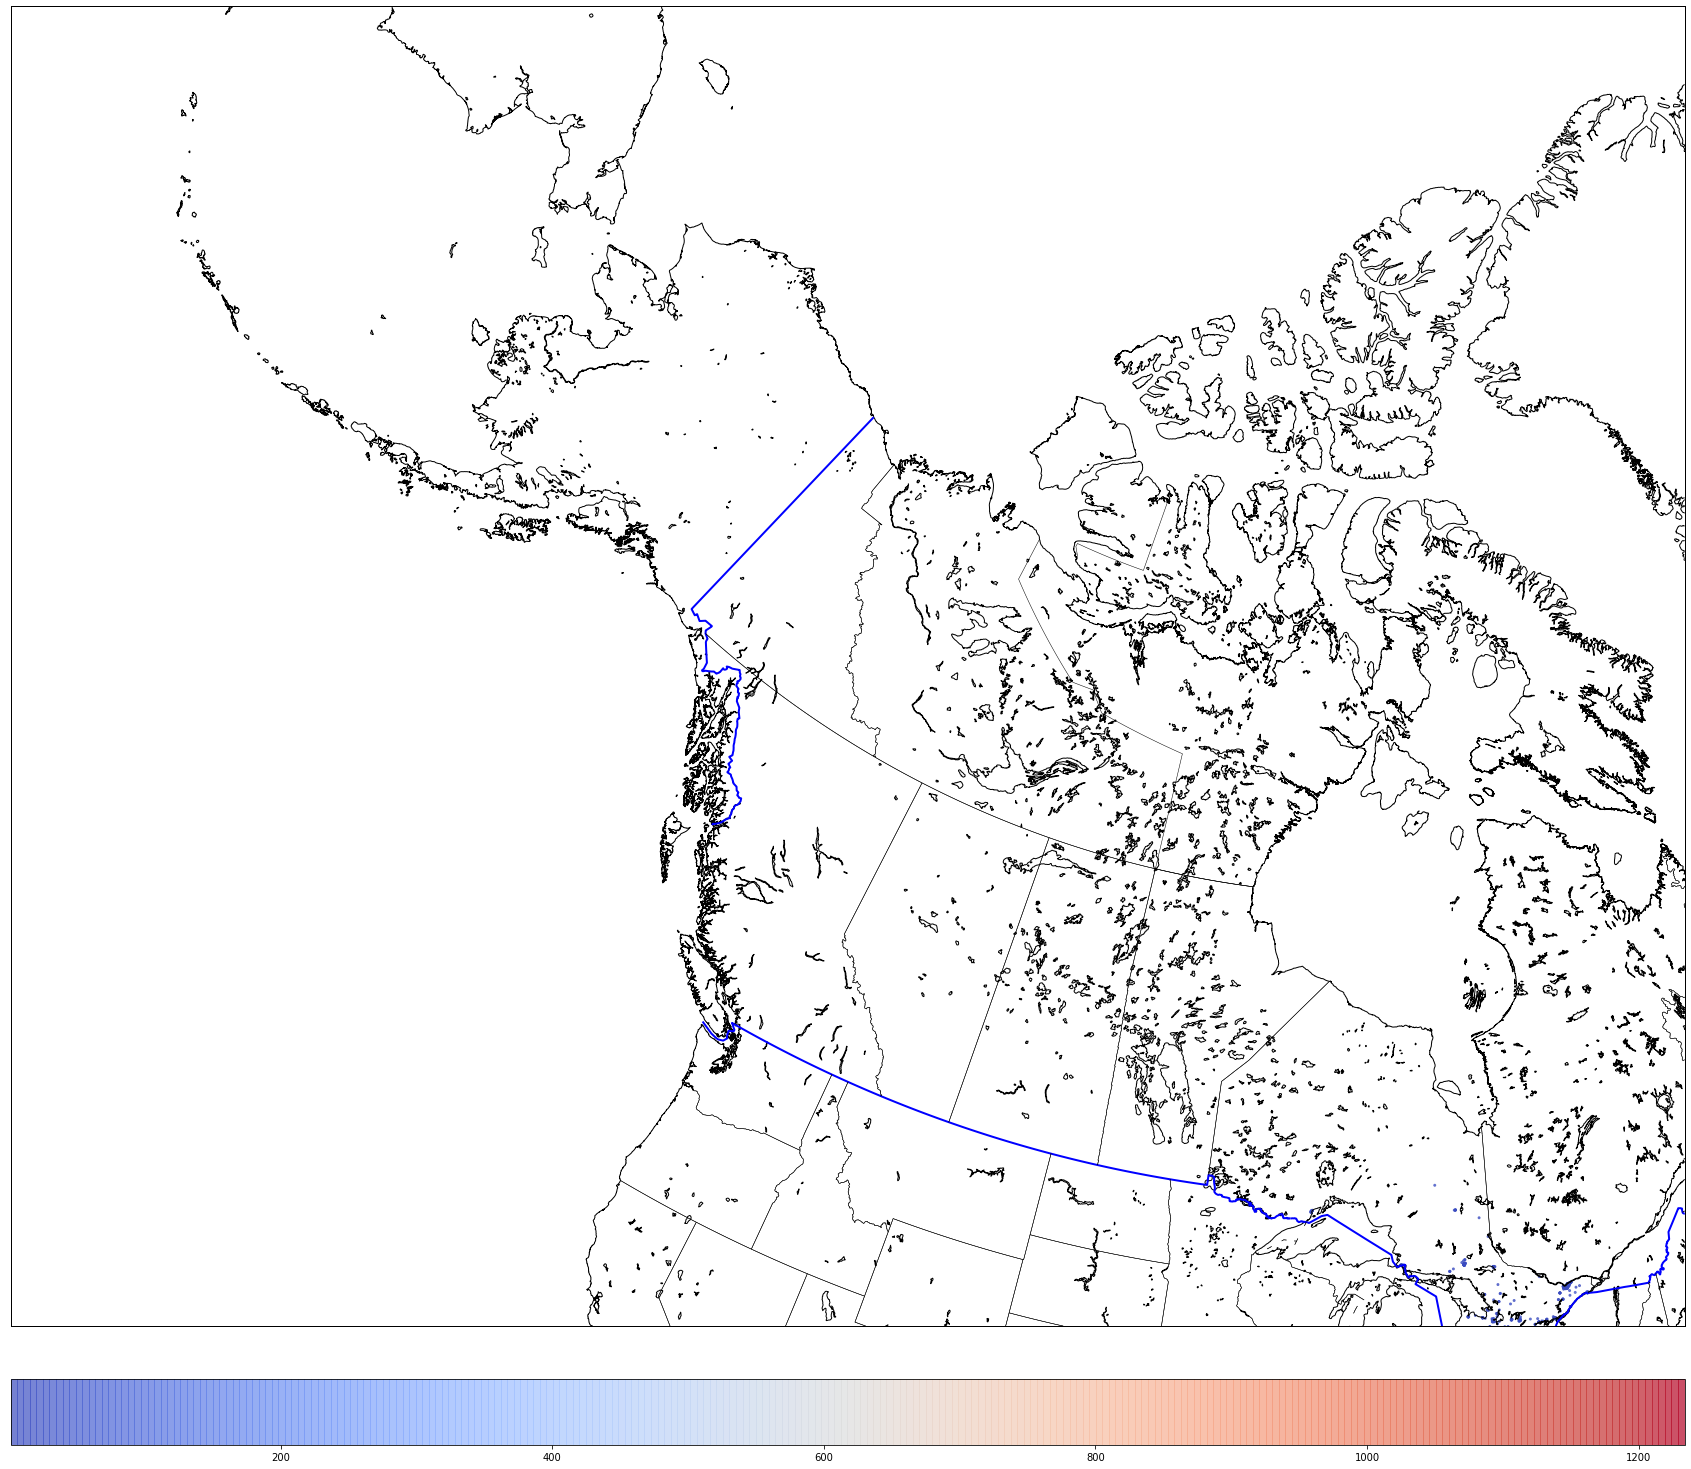

In [71]:
plot_map(df_ON,'raw_visit_counts')

In [85]:
data = df.dropna(subset=['raw_visit_counts'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964612 entries, 0 to 964611
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  964612 non-null  int64  
 1   placekey                                    964612 non-null  object 
 2   parent_placekey                             42260 non-null   object 
 3   location_name                               964612 non-null  object 
 4   street_address                              964612 non-null  object 
 5   city                                        964612 non-null  object 
 6   region                                      964612 non-null  object 
 7   postal_code                                 964612 non-null  object 
 8   iso_country_code                            964612 non-null  object 
 9   safegraph_brand_ids                         16959 non-null   object 
 

In [100]:
merge_1 = df_merge
merge_1['raw_visit_counts'] = merge_1['raw_visit_counts'] * 100

In [85]:
cluster_data = df2.loc[:,['latitude','longitude']]

In [86]:
c_sample = cluster_data.sample(frac=0.2, random_state=100)
HC = AgglomerativeClustering(n_clusters=12,linkage='ward')
c_sample_label = HC.fit_predict(c_sample[['latitude','longitude']])

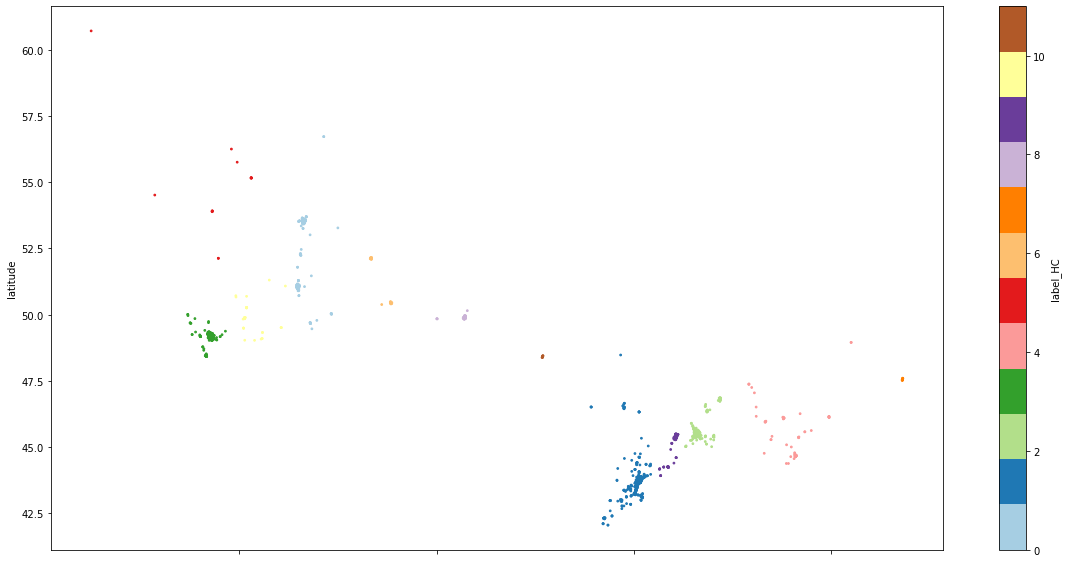

In [87]:
c_sample['label_HC'] = c_sample_label
c_sample['label_HC'] = c_sample['label_HC'].astype(int)
c_sample.plot(x='longitude',y='latitude', c='label_HC', kind='scatter', colormap='Paired', s=3, figsize=(20,10))
plt.show()

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
RF = RandomForestClassifier(random_state=100)
RF.fit(c_sample[['latitude','longitude']], c_sample['label_HC'])

RandomForestClassifier(random_state=100)

In [90]:
cluster_data['label'] = RF.predict(cluster_data)

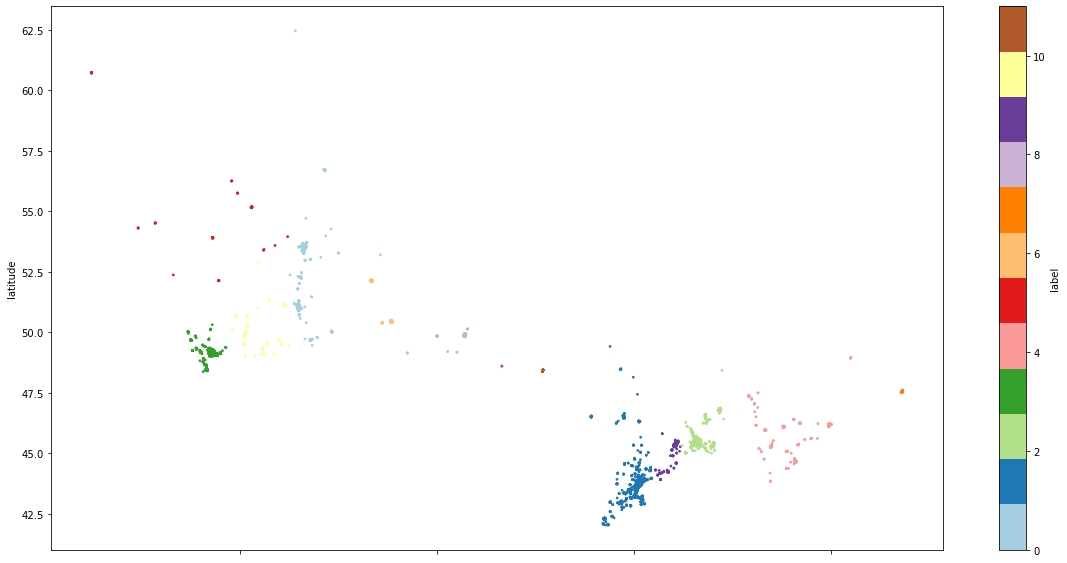

In [91]:
cluster_data.plot(x='longitude',y='latitude', c='label', kind='scatter', colormap='Paired', s=3, figsize=(20,10))
plt.show()